In [1]:
# import data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data
df1 = pd.read_csv('1950.xls')
df2 = pd.read_csv('1960.xls')
df3 = pd.read_csv('1970.xls')
df4 = pd.read_csv('1980.xls')
df5 = pd.read_csv('1990.xls')
df6 = pd.read_csv('2000.xls')
df7 = pd.read_csv('2010.xls')

# merge data
df = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0)
df.shape

(667, 15)

In [2]:
df.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60


<AxesSubplot:xlabel='dB', ylabel='pop'>

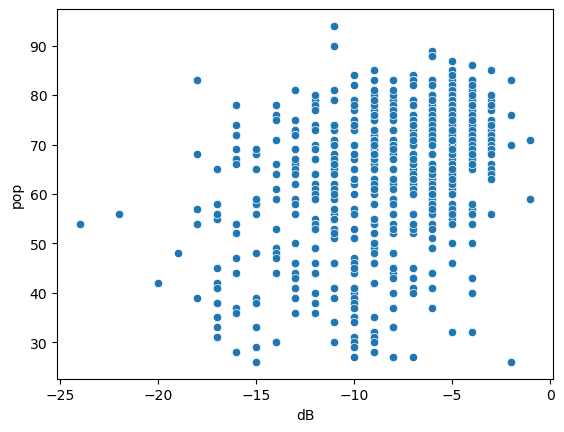

In [2]:
sns.scatterplot(x='dB', y='pop', data=df)

<AxesSubplot:xlabel='dnce', ylabel='pop'>

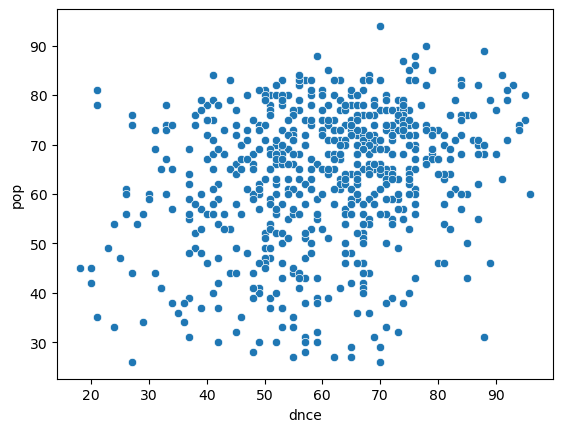

In [3]:
sns.scatterplot(x='dnce', y='pop', data=df)

<AxesSubplot:xlabel='nrgy', ylabel='pop'>

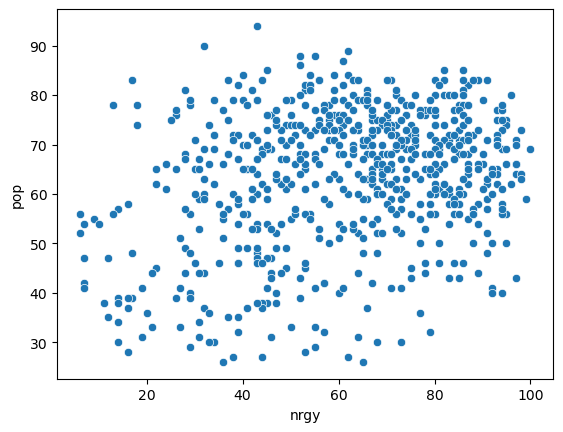

In [5]:
sns.scatterplot(x='nrgy', y='pop', data=df)

<AxesSubplot:xlabel='dur', ylabel='pop'>

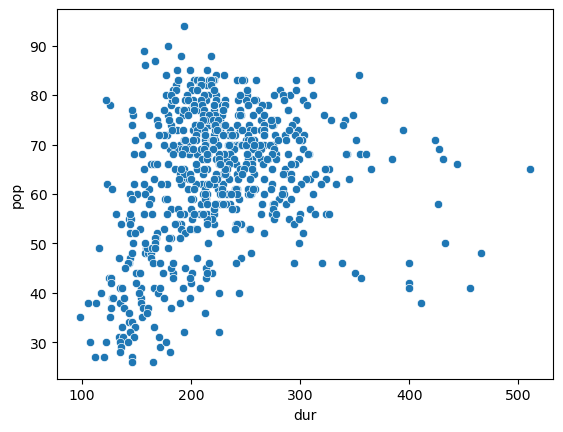

In [5]:
sns.scatterplot(x='dur', y='pop', data=df)

In [4]:
import statsmodels.formula.api as smf
model = smf.ols(formula='pop ~ dB + dnce + nrgy + acous + dur + live + val + spch', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     41.86
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           3.91e-54
Time:                        22:03:14   Log-Likelihood:                -2555.8
No. Observations:                 667   AIC:                             5130.
Df Residuals:                     658   BIC:                             5170.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.4650      4.368     16.134      0.000      61.889      79.041
dB             0.9465      0.178      5.317      0.000       0.597       1.296
dnce           0.1355      0.036      3.763      0.000       0.065       0.206
nrgy          -0.0906      0.037     -2.443      0.015      -0.163      -0.018
acous         -0.1679      0.022     -7.798      0.000      -0.210      -0.126
dur            0.0402      0.008      5.196      0.000       0.025       0.055
live          -0.0304      0.031     -0.977      0.329      -0.091       0.031
val           -0.1111      0.023     -4.830      0.000      -0.156      -0.066
spch           0.1811      0.073      2.472      0.014       0.037       0.325
==============================================================================
Omnibus:                       12.613   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.017
Skew:                          -0.342   Prob(JB):                      0.00149
Kurtosis:                       2.988   Cond. No.                     2.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
df.corr()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Number,1.000000,0.122851,0.030950,0.174730,0.046153,0.042841,0.046433,0.089254,0.058410,-0.074355,-0.059867,-0.519745
year,0.122851,1.000000,-0.020790,0.195329,0.273865,0.422602,-0.001603,-0.087055,-0.099655,-0.241289,0.193292,0.160467
bpm,0.030950,-0.020790,1.000000,0.179329,-0.057710,0.044748,0.009960,0.084723,0.038277,-0.175530,0.059116,0.066558
nrgy,0.174730,0.195329,0.179329,1.000000,0.331962,0.702543,0.132563,0.405190,0.131228,-0.665900,0.178491,0.271798
dnce,0.046153,0.273865,-0.057710,0.331962,1.000000,0.295534,-0.069818,0.454714,0.053011,-0.382297,0.207741,0.249302
dB,0.042841,0.422602,0.044748,0.702543,0.295534,1.000000,0.083423,0.136813,0.026851,-0.504551,0.200195,0.365172
live,0.046433,-0.001603,0.009960,0.132563,-0.069818,0.083423,1.000000,0.060542,-0.067533,-0.056394,0.091595,-0.036505
val,0.089254,-0.087055,0.084723,0.405190,0.454714,0.136813,0.060542,1.000000,-0.118664,-0.196375,0.053817,-0.102418
dur,0.058410,-0.099655,0.038277,0.131228,0.053011,0.026851,-0.067533,-0.118664,1.000000,-0.227505,0.045265,0.280501
acous,-0.074355,-0.241289,-0.175530,-0.665900,-0.382297,-0.504551,-0.056394,-0.196375,-0.227505,1.000000,-0.172820,-0.455239


In [2]:
# split data into train and test
from sklearn.model_selection import train_test_split
X = df.drop('pop', axis=1)
y = df['pop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [5]:
model = smf.ols(formula='pop ~ dB + dnce + nrgy + acous + dur + val + spch', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     40.43
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.75e-45
Time:                        22:03:22   Log-Likelihood:                -2021.4
No. Observations:                 533   AIC:                             4059.
Df Residuals:                     525   BIC:                             4093.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.2814      4.698     14.961      0.000      61.053      79.510
dB             1.0516      0.195      5.396      0.000       0.669       1.434
dnce           0.1711      0.038      4.448      0.000       0.096       0.247
nrgy          -0.1212      0.041     -2.947      0.003      -0.202      -0.040
acous         -0.1704      0.024     -7.125      0.000      -0.217      -0.123
dur            0.0390      0.008      4.682      0.000       0.023       0.055
val           -0.0937      0.025     -3.701      0.000      -0.143      -0.044
spch           0.1130      0.080      1.415      0.158      -0.044       0.270
==============================================================================
Omnibus:                       12.115   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.475
Skew:                          -0.374   Prob(JB):                      0.00196
Kurtosis:                       3.036   Cond. No.                     2.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
train.shape, test.shape

((533, 15), (134, 15))

In [6]:
# calculate rmse for train and test
# calculate RSE for train
train['pop_pred'] = model.predict(train)
train['residual'] = train['pop'] - train['pop_pred']
train['residual^2'] = train['residual']**2
train_rse = np.sqrt(train['residual^2'].sum() / (train.shape[0] - train.shape[1]))
print(train_rse)

from sklearn.metrics import mean_squared_error
from math import sqrt

train_rmse = sqrt(mean_squared_error(train['pop'], model.predict(train)))
test_rmse = sqrt(mean_squared_error(test['pop'], model.predict(test)))
# train_rmse2 = np.sqrt(np.mean((train['pop'] - model.predict(train))**2))

print('train rmse: ', train_rmse)
print('test rmse: ', test_rmse)

10.921663550184645
train rmse:  10.735661354264455
test rmse:  12.893948928202503


In [7]:
# calculate VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = train[['dB', 'dnce', 'nrgy', 'acous', 'dur', 'val', 'spch', 'live']]

X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)


# vif = pd.DataFrame()
# vif['VIF'] = [variance_inflation_factor(train[['dB', 'dnce', 'nrgy', 'acous', 'dur', 'val', 'spch', 'live']].values, i) for i in range(train[['dB', 'dnce', 'nrgy', 'acous', 'dur', 'val', 'spch', 'live']].shape[1])]
# vif

  feature         VIF
0   const  102.882136
1      dB    2.229759
2    dnce    1.583150
3    nrgy    3.454719
4   acous    2.041898
5     dur    1.105256
6     val    1.742915
7    spch    1.101074
8    live    1.051147


In [8]:
# new model with all interactions
model_all = smf.ols(formula='pop ~ dB + dnce + nrgy + acous + dur + val + spch + dB:dnce + dB:nrgy + dB:acous + dB:dur + dB:val + dB:spch + dB:live + dnce:nrgy + dnce:acous + dnce:dur + dnce:val + dnce:spch + dnce:live + nrgy:acous + nrgy:dur + nrgy:val + nrgy:spch + nrgy:live + acous:dur + acous:val + acous:spch + acous:live + dur:val + dur:spch + dur:live + val:spch + val:live + spch:live', data=train).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     10.33
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           5.04e-40
Time:                        22:03:44   Log-Likelihood:                -1990.7
No. Observations:                 533   AIC:                             4053.
Df Residuals:                     497   BIC:                             4207.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.3615     26.568      1.406      0.160     -14.837      89.560
dB            -0.3517      1.494     -0.235      0.814      -3.287       2.583
dnce           0.7355      0.330      2.231      0.026       0.088       1.383
nrgy           0.2002      0.271      0.739      0.460      -0.332       0.732
acous         -0.1460      0.190     -0.767      0.443      -0.520       0.228
dur            0.0897      0.074      1.216      0.224      -0.055       0.235
val           -0.6015      0.232     -2.595      0.010      -1.057      -0.146
spch           3.8000      1.083      3.508      0.000       1.671       5.928
dB:dnce        0.0070      0.016      0.436      0.663      -0.025       0.039
dB:nrgy        0.0116      0.010      1.211      0.227      -0.007       0.030
dB:acous       0.0088      0.010      0.927      0.355      -0.010       0.028
dB:dur        -0.0004      0.003     -0.107      0.915      -0.007       0.006
dB:val        -0.0107      0.010     -1.094      0.274      -0.030       0.009
dB:spch        0.0781      0.046      1.686      0.092      -0.013       0.169
dB:live        0.0241      0.013      1.813      0.070      -0.002       0.050
dnce:nrgy     -0.0038      0.003     -1.179      0.239      -0.010       0.003
dnce:acous    -0.0011      0.002     -0.582      0.561      -0.005       0.003
dnce:dur      -0.0008      0.001     -1.181      0.238      -0.002       0.001
dnce:val       0.0001      0.002      0.068      0.946      -0.003       0.003
dnce:spch     -0.0110      0.006     -1.737      0.083      -0.023       0.001
dnce:live     -0.0007      0.002     -0.306      0.760      -0.005       0.004
nrgy:acous     0.0015      0.002      0.950      0.343      -0.002       0.005
nrgy:dur      -0.0006      0.001     -0.972      0.332      -0.002       0.001
nrgy:val       0.0032      0.002      1.811      0.071      -0.000       0.007
nrgy:spch     -0.0147      0.008     -1.760      0.079      -0.031       0.002
nrgy:live     -0.0001      0.002     -0.053      0.958      -0.004       0.004
acous:dur      0.0002      0.000      0.522      0.602      -0.001       0.001
acous:val      0.0011      0.001      0.869      0.385      -0.001       0.003
acous:spch    -0.0018      0.005     -0.367      0.713      -0.012       0.008
acous:live    -0.0010      0.002     -0.596      0.552      -0.004       0.002
dur:val        0.0007      0.000      1.927      0.055    -1.4e-05       0.001
dur:spch      -0.0048      0.002     -2.805      0.005      -0.008      -0.001
dur:live       0.0006      0.001      0.996      0.320      -0.001       0.002
val:spch      -0.0021      0.004     -0.521      0.603      -0.010       0.006
val:live       0.0021      0.002      1.118      0.264      -0.002       0.006
spch:live     -0.0055      0.004     -1.248      0.213      -0.014       0.003
==

In [20]:
# calculate RSE for train and RMSE for test
train['pop_pred'] = model_all.predict(train)
train['residual'] = train['pop'] - train['pop_pred']
train['residual^2'] = train['residual']**2
train_rse = np.sqrt(train['residual^2'].sum() / (train.shape[0] - train.shape[1]))
print(train_rse)

test_rmse = sqrt(mean_squared_error(test['pop'], model_all.predict(test)))

print('test rmse: ', test_rmse)

# calculate MAE for test
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(test['pop'], model_all.predict(test))
print('test mae: ', test_mae)

10.31001240075295
test rmse:  12.648582372932623
test mae:  10.173163667928025


In [37]:
model_some = smf.ols(formula = 'pop ~ dB + dnce + nrgy + acous + dur + val + spch + bpm + dB*dnce + dB*nrgy + dB*acous', data=train).fit()
model_some.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     26.16
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           2.56e-43
Time:                        23:28:16   Log-Likelihood:                -2019.1
No. Observations:                 533   AIC:                             4062.
Df Residuals:                     521   BIC:                             4114.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.3516      8.721      7.379      0.000      47.218      81.485
dB             0.6733      0.854      0.789      0.431      -1.004       2.351
dnce           0.1167      0.087      1.346      0.179      -0.054       0.287
nrgy          -0.0437      0.082     -0.533      0.594      -0.205       0.118
acous         -0.0826      0.066     -1.247      0.213      -0.213       0.048
dur            0.0393      0.008      4.651      0.000       0.023       0.056
val           -0.1016      0.026     -3.962      0.000      -0.152      -0.051
spch           0.1158      0.081      1.431      0.153      -0.043       0.275
bpm            0.0212      0.019      1.100      0.272      -0.017       0.059
dB:dnce       -0.0076      0.010     -0.792      0.429      -0.027       0.011
dB:nrgy        0.0098      0.008      1.161      0.246      -0.007       0.026
dB:acous       0.0089      0.007      1.306      0.192      -0.005       0.022
==============================================================================
Omnibus:                       13.559   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.140
Skew:                          -0.399   Prob(JB):                     0.000850
Kurtosis:                       2.998   Cond. No.                     1.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# calculate RMSE for train and test
train['pop_pred'] = model_some.predict(train)
train['residual'] = train['pop'] - train['pop_pred']
train['residual^2'] = train['residual']**2
train_rse = np.sqrt(train['residual^2'].sum() / (train.shape[0] - train.shape[1]))
print(train_rse)

train_rmse = sqrt(mean_squared_error(train['pop'], model_some.predict(train)))
test_rmse = sqrt(mean_squared_error(test['pop'], model_some.predict(test)))

# print('train rmse: ', train_rmse)
print('test rmse: ', test_rmse)

10.874744495841165
test rmse:  12.982349125359638


# Regularization

In [10]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

alphas = 10**np.linspace(10,-2,100)*0.1


In [12]:
train.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,pop_pred,residual,residual^2
64,65,Lady Writer,Dire Straits,album rock,1979,148,81,63,-9,7,96,225,10,3,61,60.828783,0.171217,0.029315
19,20,Forgot About Dre,Dr. Dre,g funk,1999,134,74,92,-1,16,62,222,8,8,71,78.746019,-7.746019,60.000805
4,5,I Wanna Dance with Somebody (Who Loves Me),Whitney Houston,dance pop,1987,119,82,71,-9,9,87,291,21,5,80,63.319125,16.680875,278.251583
61,62,Butterfingers,Tommy Steele,classic uk pop,2000,75,14,52,-14,14,26,135,70,3,30,52.302983,-22.302983,497.423071
72,73,So Much In Love,The Tymes,beach music,1963,76,49,55,-10,45,44,140,79,3,45,45.116149,-0.116149,0.013491


In [44]:
#Standardizing predictors so that each of them have zero mean and unit variance

#Filtering all predictors
X = train[['nrgy', 'dnce', 'dB', 'val', 'dur', 'acous', 'spch']]

#Defining a scaler object
scaler = StandardScaler()

#The scaler object will contain the mean and variance of each column (predictor) of X. 
#These values will be useful to scale test data based on the same mean and variance as obtained on train data
scaler.fit(X)

#Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
Xstd = scaler.transform(X)

In [45]:
y = train['pop']
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)

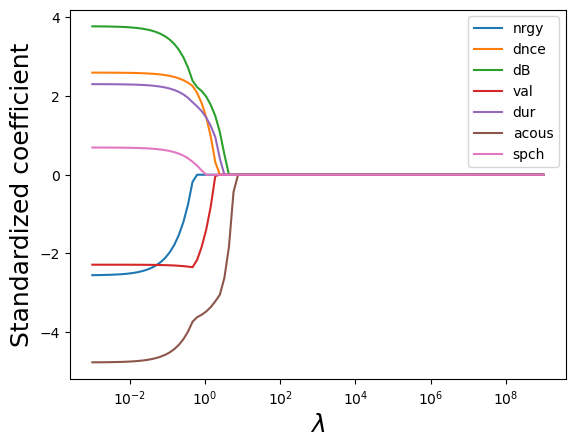

In [47]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(X);
# plt.plot([lassocv.alpha_,lassocv.alpha_],[-0.4,0.25],':')
# plt.legend(train.columns[1:6]);
plt.show()

In [32]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(-1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

5e-06

Text(0, 0.5, 'Cross-validation error')

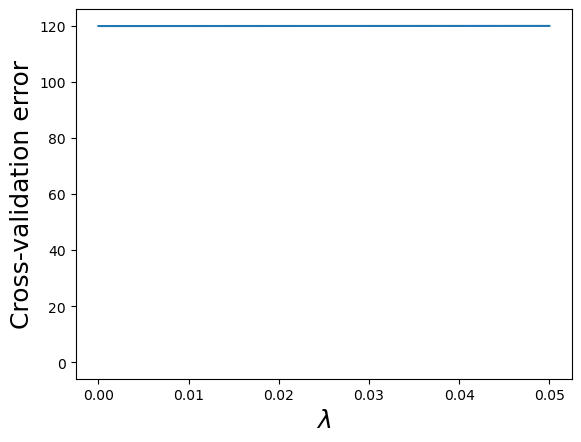

In [38]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(lassocv.alphas_,lassocv.mse_path_.mean(axis=1))
plt.plot([lassocv.alpha_,lassocv.alpha_],[0.145,0.151],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

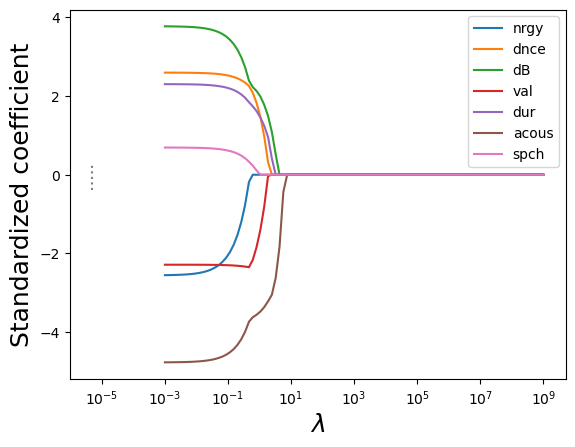

In [48]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
alphas = 10**np.linspace(10,-2,100)*0.1
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.legend(X);
plt.plot([lassocv.alpha_,lassocv.alpha_],[-0.4,0.25],':')
# plt.legend(train.columns[1:6]);
plt.show()

In [40]:
#Using the developed lasso model to predict on test data
Xtest = test[['nrgy', 'dnce', 'dB', 'val', 'dur', 'acous', 'spch']]
Xtest_std = scaler.transform(Xtest)
ytest = test['pop']
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xstd, y)
pred=lasso.predict(Xtest_std)

# MAE on test data
mean_absolute_error(ytest, pred)

10.387079871968721

In [41]:
# improved model v4 
# model obtained through subset selection
model_best = model = smf.ols(formula='pop~acous+dB+dur+nrgy*dnce+val+I(np.log(dur))', data=train).fit()
model_best.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     45.52
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.97e-55
Time:                        22:40:26   Log-Likelihood:                -1995.7
No. Observations:                 533   AIC:                             4009.
Df Residuals:                     524   BIC:                             4048.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -252.3448     44.948     -5.614      0.000    -340.644    -164.045
acous             -0.1078      0.024     -4.409      0.000      -0.156      -0.060
dB                 0.9601      0.186      5.154      0.000       0.594       1.326
dur               -0.2426      0.042     -5.834      0.000      -0.324      -0.161
nrgy               0.1570      0.095      1.648      0.100      -0.030       0.344
dnce               0.4220      0.094      4.490      0.000       0.237       0.607
nrgy:dnce         -0.0045      0.001     -3.123      0.002      -0.007      -0.002
val               -0.0794      0.024     -3.245      0.001      -0.127      -0.031
I(np.log(dur))    68.4033      9.837      6.953      0.000      49.078      87.729
==============================================================================
Omnibus:                        8.968   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.020
Skew:                          -0.282   Prob(JB):                       0.0110
Kurtosis:                       3.297   Cond. No.                     4.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# calculate MAE on test data with model_best
test_mae = mean_absolute_error(test['pop'], model_best.predict(test))
print('test mae: ', test_mae)

test mae:  9.63220541063489
